In [1]:
!pip install matplotlib seaborn plotly -q

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from collections import defaultdict
import random
from datetime import datetime
import pandas as pd
from IPython.display import display, clear_output
import ipywidgets as widgets

print("Dependencies installed and imported successfully!")

Dependencies installed and imported successfully!


In [2]:
class SimplePoll:
    def __init__(self):
        self.polls = {}
        self.current_poll_id = None

    def create_poll(self, question, options):
        """Create a new poll with given question and options"""
        poll_id = f"poll_{len(self.polls) + 1}_{random.randint(1000, 9999)}"
        self.polls[poll_id] = {
            'question': question,
            'options': options,
            'votes': {option: 0 for option in options},
            'created_at': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
            'total_votes': 0
        }
        self.current_poll_id = poll_id
        return poll_id

    def vote(self, poll_id, option):
        """Cast a vote for an option"""
        if poll_id in self.polls and option in self.polls[poll_id]['votes']:
            self.polls[poll_id]['votes'][option] += 1
            self.polls[poll_id]['total_votes'] += 1
            return True
        return False

    def get_results(self, poll_id):
        """Get poll results"""
        if poll_id in self.polls:
            return self.polls[poll_id]
        return None

    def list_polls(self):
        """List all available polls"""
        return list(self.polls.keys())

# Initialize poll manager
poll_manager = SimplePoll()
print("Poll system initialized!")

Poll system initialized!


In [6]:
def create_new_poll():
    print("CREATE NEW POLL")
    print("=" * 50)

    # Get question
    question = input("Enter your poll question: ").strip()
    if not question:
        print("Question cannot be empty!")
        return None

    # Get options
    print("\nEnter poll options (press Enter after each option, type 'done' when finished):")
    options = []
    while True:
        option = input(f"Option {len(options) + 1}: ").strip()
        if option.lower() == 'done':
            break
        if option and option not in options:
            options.append(option)
        elif option in options:
            print("Option already exists!")

    if len(options) < 2:
        print("At least 2 options are required!")
        return None

    # Create poll
    poll_id = poll_manager.create_poll(question, options)
    print(f"\nPoll created successfully!")
    print(f"Poll ID: {poll_id}")
    print(f"Question: {question}")
    print("Options:", ", ".join(options))

    return poll_id

# Create your first poll
poll_id = create_new_poll()

CREATE NEW POLL
Enter your poll question: WHo is going to win

Enter poll options (press Enter after each option, type 'done' when finished):
Option 1: pak
Option 2: india
Option 3: done

Poll created successfully!
Poll ID: poll_2_1804
Question: WHo is going to win
Options: pak, india


In [9]:
def cast_vote(poll_id=None):
    if not poll_id:
        poll_id = poll_manager.current_poll_id

    if not poll_id or poll_id not in poll_manager.polls:
        print("No active poll found!")
        return

    poll = poll_manager.get_results(poll_id)
    print("CAST YOUR VOTE")
    print("=" * 50)
    print(f"Question: {poll['question']}")
    print("\nOptions:")

    for i, option in enumerate(poll['options'], 1):
        print(f"{i}. {option}")

    try:
        choice = int(input(f"\nEnter your choice (1-{len(poll['options'])}): "))
        if 1 <= choice <= len(poll['options']):
            selected_option = poll['options'][choice - 1]
            if poll_manager.vote(poll_id, selected_option):
                print(f"\nVote cast successfully for: {selected_option}")
                return True
        else:
            print("Invalid choice!")
    except ValueError:
        print("Please enter a valid number!")

    return False

# Cast some votes (run this cell multiple times to vote)
cast_vote()


CAST YOUR VOTE
Question: WHo is going to win

Options:
1. pak
2. india

Enter your choice (1-2): 1

Vote cast successfully for: pak


True

In [16]:
def show_poll_results(poll_id=None, chart_type='bar'):
    if not poll_id:
        poll_id = poll_manager.current_poll_id

    if not poll_id or poll_id not in poll_manager.polls:
        print("No poll found!")
        return

    poll = poll_manager.get_results(poll_id)

    print("POLL RESULTS")
    print("=" * 50)
    print(f"Question: {poll['question']}")
    print(f"Total Votes: {poll['total_votes']}")
    print(f"Created: {poll['created_at']}")
    print()

    for option, votes in poll['votes'].items():
        percentage = (votes / poll['total_votes'] * 100) if poll['total_votes'] > 0 else 0
        print(f"{option}: {votes} votes ({percentage:.1f}%)")

    if poll['total_votes'] > 0:
        # Create visualizations
        options = list(poll['votes'].keys())
        votes = list(poll['votes'].values())

        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle(f"Poll Results: {poll['question']}", fontsize=16, fontweight='bold')

        # Bar chart
        colors = plt.cm.Set3(range(len(options)))
        ax1.bar(options, votes, color=colors)
        ax1.set_title('Bar Chart')
        ax1.set_ylabel('Votes')
        ax1.tick_params(axis='x', rotation=45)

        # Pie chart
        ax2.pie(votes, labels=options, autopct='%1.1f%%', colors=colors)
        ax2.set_title('Pie Chart')

        # Horizontal bar chart
        ax3.barh(options, votes, color=colors)
        ax3.set_title('Horizontal Bar Chart')
        ax3.set_xlabel('Votes')

        # Donut chart
        wedges, texts, autotexts = ax4.pie(votes, labels=options, autopct='%1.1f%%', colors=colors)
        centre_circle = plt.Circle((0,0), 0.70, fc='white')
        ax4.add_artist(centre_circle)
        ax4.set_title('Donut Chart')

        plt.tight_layout()
        plt.show()

        # Interactive plotly chart
        df = pd.DataFrame({'Option': options, 'Votes': votes})
        fig_plotly = px.bar(df, x='Option', y='Votes',
                           title=f"Interactive Results: {poll['question']}",
                           color='Votes', color_continuous_scale='viridis')
        fig_plotly.show()

POLL RESULTS
Question: WHo is going to win
Total Votes: 1
Created: 2025-08-10 22:24:18

pak: 1 votes (100.0%)
india: 0 votes (0.0%)


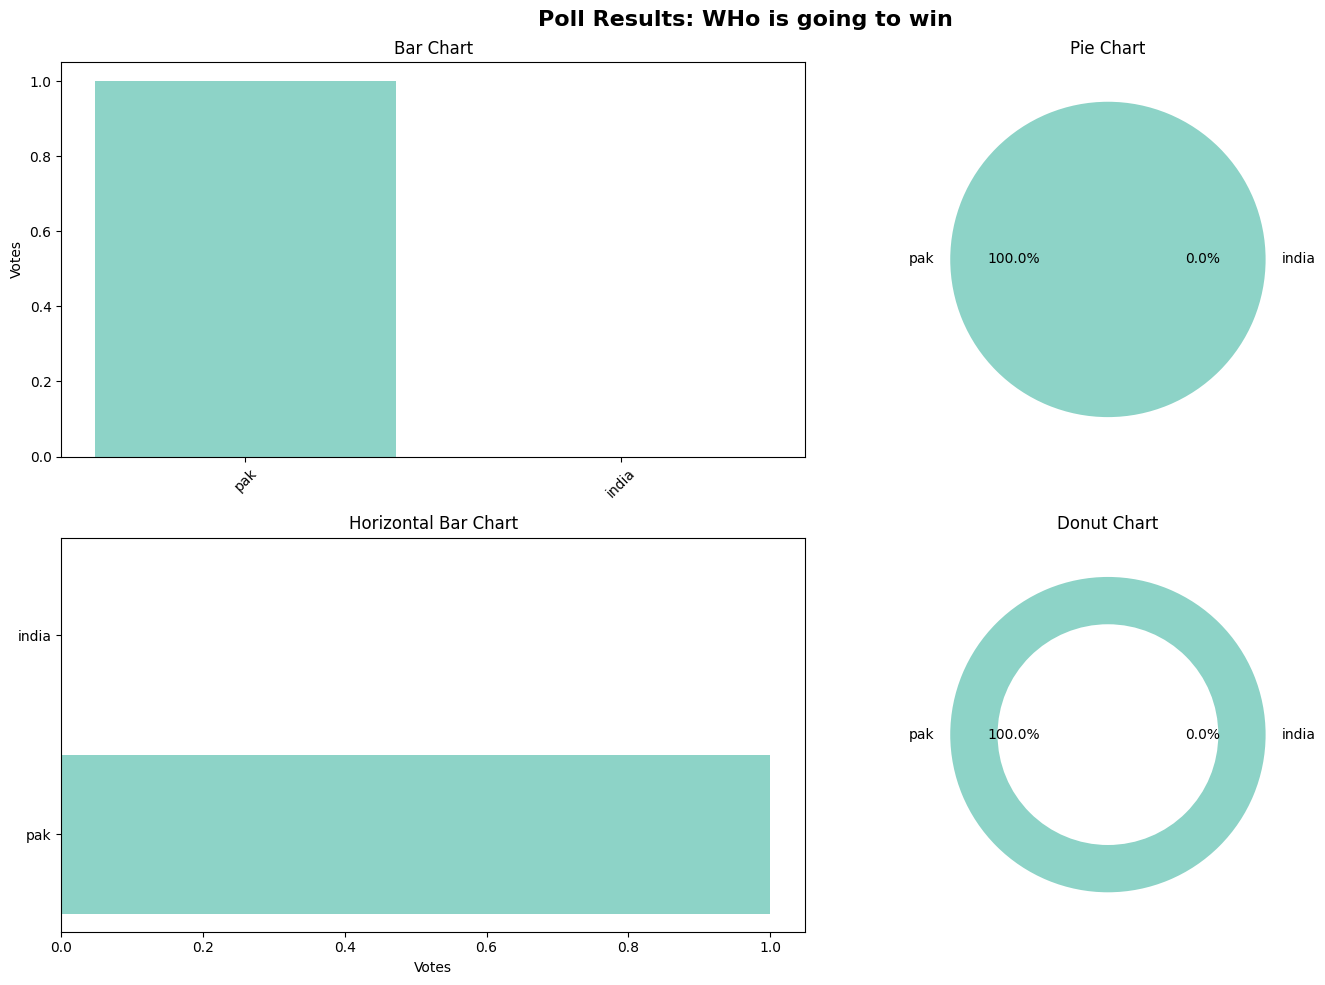

In [17]:
# Show results for current poll
show_poll_results()

In [ ]:
def poll_dashboard():
    """Interactive dashboard for poll management"""
    print("POLL DASHBOARD")
    print("=" * 50)

    all_polls = poll_manager.list_polls()
    if not all_polls:
        print("No polls created yet!")
        return

    print("Available polls:")
    for i, poll_id in enumerate(all_polls, 1):
        poll = poll_manager.get_results(poll_id)
        print(f"{i}. {poll['question']} (ID: {poll_id}) - {poll['total_votes']} votes")

    print("\nOptions:")
    print("1. View detailed results for a poll")
    print("2. Cast vote in a poll")
    print("3. Create new poll")
    print("4. Generate comparison report")

    try:
        choice = int(input("\nEnter your choice (1-4): "))

        if choice == 1:
            poll_num = int(input("Enter poll number: "))
            if 1 <= poll_num <= len(all_polls):
                show_poll_results(all_polls[poll_num - 1])

        elif choice == 2:
            poll_num = int(input("Enter poll number: "))
            if 1 <= poll_num <= len(all_polls):
                cast_vote(all_polls[poll_num - 1])

        elif choice == 3:
            create_new_poll()

        elif choice == 4:
            generate_comparison_report()

    except (ValueError, IndexError):
        print("Invalid input!")

def generate_comparison_report():
    """Generate a comparison report of all polls"""
    all_polls = poll_manager.list_polls()
    if len(all_polls) < 2:
        print("Need at least 2 polls for comparison!")
        return

    print("\nPOLL COMPARISON REPORT")
    print("=" * 50)

    report_data = []
    for poll_id in all_polls:
        poll = poll_manager.get_results(poll_id)
        report_data.append({
            'Question': poll['question'][:30] + "..." if len(poll['question']) > 30 else poll['question'],
            'Total Votes': poll['total_votes'],
            'Options Count': len(poll['options']),
            'Created': poll['created_at']
        })

    df = pd.DataFrame(report_data)
    print(df.to_string(index=False))

    # Visual comparison
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    questions = [data['Question'] for data in report_data]
    total_votes = [data['Total Votes'] for data in report_data]
    option_counts = [data['Options Count'] for data in report_data]

    ax1.bar(range(len(questions)), total_votes)
    ax1.set_title('Total Votes per Poll')
    ax1.set_ylabel('Total Votes')
    ax1.set_xticks(range(len(questions)))
    ax1.set_xticklabels([f"Poll {i+1}" for i in range(len(questions))], rotation=45)

    ax2.bar(range(len(questions)), option_counts, color='orange')
    ax2.set_title('Number of Options per Poll')
    ax2.set_ylabel('Option Count')
    ax2.set_xticks(range(len(questions)))
    ax2.set_xticklabels([f"Poll {i+1}" for i in range(len(questions))], rotation=45)

    plt.tight_layout()
    plt.show()

# Run the dashboard
poll_dashboard()

POLL DASHBOARD
Available polls:
1. Hi (ID: poll_1_7462) - 1 votes
2. WHo is going to win (ID: poll_2_1804) - 1 votes

Options:
1. View detailed results for a poll
2. Cast vote in a poll
3. Create new poll
4. Generate comparison report

Enter your choice (1-4): 2
Enter poll number: 1
CAST YOUR VOTE
Question: Hi

Options:
1. hi1
2. hi2
3. hi4
